# Philippine Dengue Cases from 2016 - 2021

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Read the file analyze its data

In [52]:
# Data from https://data.humdata.org/dataset/philippine-dengue-cases-and-deaths
dengue_data = pd.read_csv('ph_dengue_2016-2021.csv')
dengue_data.head()

,Location,Cases,Deaths,Date,Region
0,ALBAY,15,0.0,01/10/2016,REGION V-BICOL REGION
1,ALBAY,13,0.0,1/17/2016,REGION V-BICOL REGION
2,ALBAY,9,0.0,1/24/2016,REGION V-BICOL REGION
3,ALBAY,14,0.0,1/31/2016,REGION V-BICOL REGION
4,ALBAY,9,0.0,02/07/2016,REGION V-BICOL REGION


In [53]:
dengue_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32701 entries, 0 to 32700
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Location  32701 non-null  object 
 1   Cases     32701 non-null  int64  
 2   Deaths    32700 non-null  float64
 3   Date      32701 non-null  object 
 4   Region    32701 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 1.2+ MB


### Data Cleaning

In [54]:
# Check if there is null value
dengue_data.isnull().sum()

Location    0
Cases       0
Deaths      1
Date        0
Region      0
dtype: int64

In [55]:
# Check the NaN value
null_data = dengue_data[dengue_data.isna().any(axis=1)]
null_data.head()

,Location,Cases,Deaths,Date,Region
12774,QUEZON CITY,48,NaN,05/07/2017,NATIONAL CAPITAL REGION


In [56]:
# Drop the null value and store it in a variable
dengue_data = dengue_data.dropna()
dengue_data.head()

,Location,Cases,Deaths,Date,Region
0,ALBAY,15,0.0,01/10/2016,REGION V-BICOL REGION
1,ALBAY,13,0.0,1/17/2016,REGION V-BICOL REGION
2,ALBAY,9,0.0,1/24/2016,REGION V-BICOL REGION
3,ALBAY,14,0.0,1/31/2016,REGION V-BICOL REGION
4,ALBAY,9,0.0,02/07/2016,REGION V-BICOL REGION


In [57]:
# Check if there is a data duplication
dengue_data.duplicated().sum()

0

### Convert columns to correct data type

In [58]:
# Convert Deaths column into int
dengue_data['Deaths'] = dengue_data['Deaths'].astype(int)

In [59]:
# Convert Date column into datetime
dengue_data['Date'] = pd.to_datetime(dengue_data['Date'])

In [60]:
dengue_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32700 entries, 0 to 32700
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Location  32700 non-null  object        
 1   Cases     32700 non-null  int64         
 2   Deaths    32700 non-null  int32         
 3   Date      32700 non-null  datetime64[ns]
 4   Region    32700 non-null  object        
dtypes: datetime64[ns](1), int32(1), int64(1), object(2)
memory usage: 1.4+ MB


### Augement data with additional columns

In [61]:
# Add Year and Month Column
dengue_data['Year'] = dengue_data['Date'].dt.year
dengue_data['Month'] = dengue_data['Date'].dt.month

In [62]:
dengue_data.head()

,Location,Cases,Deaths,Date,Region,Year,Month
0,ALBAY,15,0,2016-01-10,REGION V-BICOL REGION,2016,1
1,ALBAY,13,0,2016-01-17,REGION V-BICOL REGION,2016,1
2,ALBAY,9,0,2016-01-24,REGION V-BICOL REGION,2016,1
3,ALBAY,14,0,2016-01-31,REGION V-BICOL REGION,2016,1
4,ALBAY,9,0,2016-02-07,REGION V-BICOL REGION,2016,2


### 1. What is the annual pattern of dengue infections, and in which year were the highest number of dengue cases recorded? In which year were the highest number of deaths recorder?

In [63]:
# Use the groupby function to select the Year data
dengue_per_year = dengue_data.groupby('Year').sum(numeric_only = True)

In [64]:
dengue_per_year

,Cases,Deaths,Month
Year,,,
2016,209544,8127,41244
2017,154107,4563,43139
2018,250783,1226,43344
2019,441902,1733,42966
2020,91041,1195,42208
2021,2087,8,252


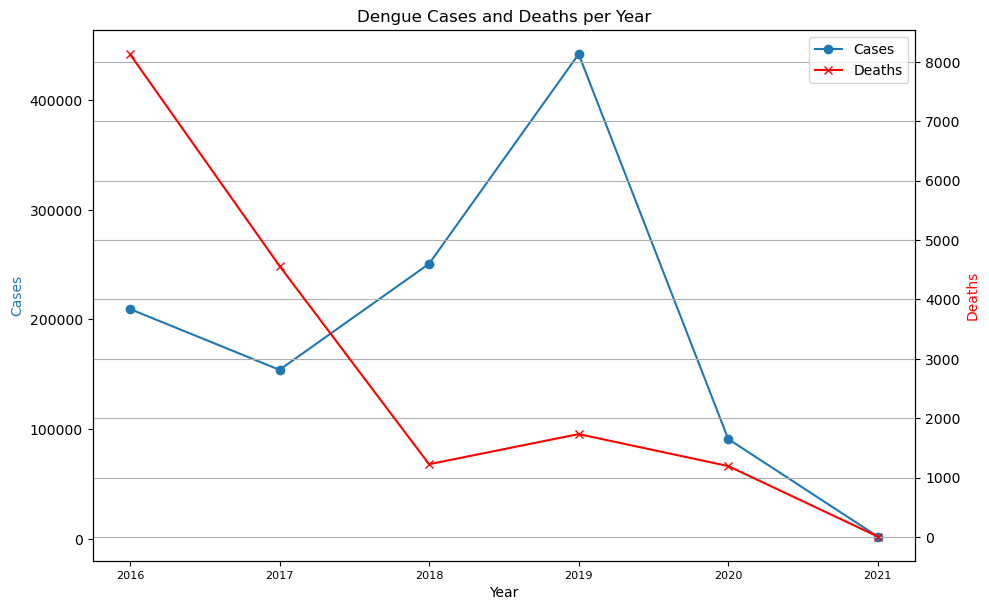

In [65]:
# Plot figure size
fig, ax1 = plt.subplots(figsize=(10, 6))

ax2 = ax1.twinx()

# X values
years = range(2016,2022)

# Plot Cases on the first y-axis (left)
ax1.plot(years, dengue_per_year['Cases'], color='#1f77b4', marker='o', label='Cases')
ax1.set_xlabel('Year')
ax1.set_ylabel('Cases', color='#1f77b4')
ax1.set_xticks(years)
ax1.set_xticklabels(years, size=8)

# Plot Deaths on the second y-axis (right)
ax2.plot(years, dengue_per_year['Deaths'], color='r', marker='x', label='Deaths')
ax2.set_ylabel('Deaths', color='r')

# Combine both datasets' legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.title('Dengue Cases and Deaths per Year')
plt.grid(True) 
plt.show()

### From the graph, it is evident that the year 2019 had the highest overall number of cases, whereas 2021 exhibited the lowest count. Also, it is evident that the year 2016 had the highest overall number of deaths, whereas 2021 exhibited the lowest count

### 2. During which month do dengue cases  and deaths typically peak in terms of their frequency?

In [66]:
# Use the groupby function to select the Month data
dengue_per_month = dengue_data.groupby('Month').sum(numeric_only = True)
dengue_per_month

,Cases,Deaths,Year
Month,,,
1,86415,402,5584319
2,77801,315,5077296
3,57576,291,5586210
4,32508,200,5585706
5,32339,162,5581799
6,58110,322,5331690
7,138242,611,5837706
8,187554,714,5331816
9,177943,6148,5585958


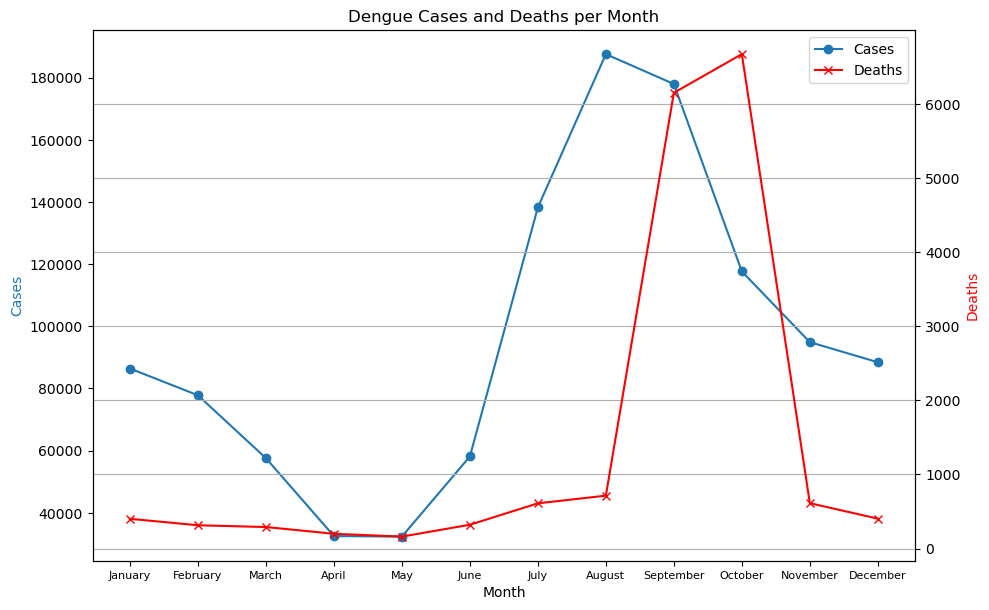

In [67]:
# Plot figure size
fig, ax1 = plt.subplots(figsize=(10, 6))

ax2 = ax1.twinx()

# X values
months = [
    "January", "February", "March", "April",
    "May", "June", "July", "August",
    "September", "October", "November", "December"]

# Plot Cases on the first y-axis (left)
ax1.plot(months, dengue_per_month['Cases'], color='#1f77b4', marker='o', label='Cases')
ax1.set_xlabel('Month')
ax1.set_ylabel('Cases', color='#1f77b4')
ax1.set_xticks(months)
ax1.set_xticklabels(months, size=8)

# Plot Deaths on the second y-axis (right)
ax2.plot(months, dengue_per_month['Deaths'], color='r', marker='x', label='Deaths')
ax2.set_ylabel('Deaths', color='r')

# Combine both datasets' legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.title('Dengue Cases and Deaths per Month')
plt.grid(True) 
plt.show()


### From the graph, it is evident that the month of  August had the highest overall number of cases, whereas month of April and May has the lowest count. Also, it is evident that the month of  October had the highest overall number of deaths, whereas month of April and May has the lowest count

### 3. What is the total number of cases per region, and what region accumulates the highest number of dengue cases and deaths?

In [68]:
# Use the groupby function to select the Region data
dengue_per_region = dengue_data.groupby('Region').sum(numeric_only = True)
dengue_per_region

,Cases,Deaths,Year,Month
Region,,,,
BARMM,11540,332,2613340,8420
CAR,30608,1008,3658676,11788
CARAGA,35305,966,5749348,18524
NATIONAL CAPITAL REGION,116099,4009,8883339,28623
REGION III-CENTRAL LUZON,132158,485,4740336,15354
REGION IV-A-CALABARZON,163177,653,3160224,10236
REGION IVB-MIMAROPA,30887,131,3160224,10236
REGION IX-ZAMBOANGA PENINSULA,47794,532,2623435,8475
REGION V-BICOL REGION,22195,185,3686928,11942


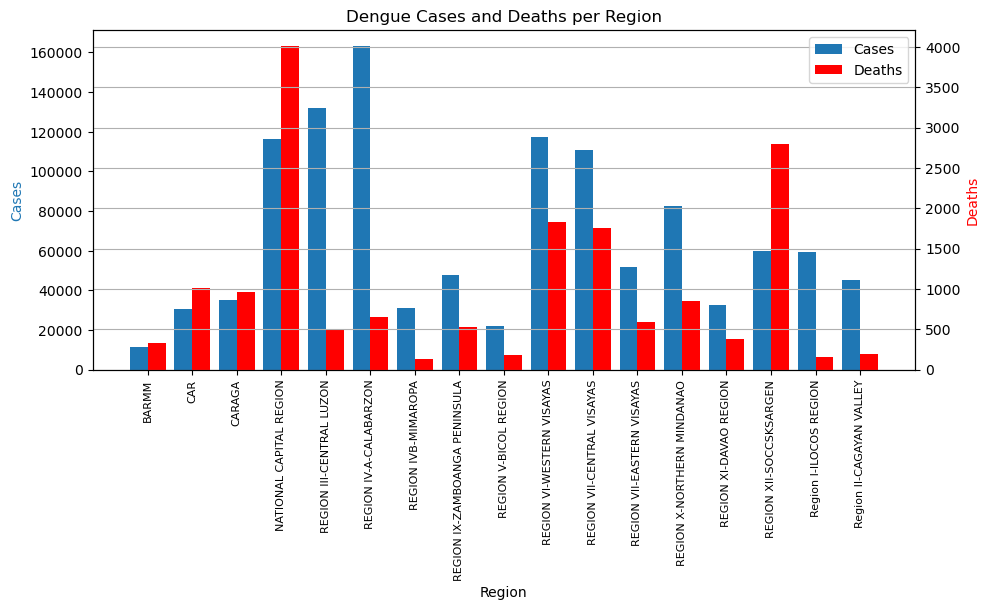

In [69]:
# X values
region_group = dengue_data.groupby('Region')
region_cases = region_group.sum(numeric_only = True)['Cases']
region_group = dengue_data.groupby('Region')
region_deaths = region_group.sum(numeric_only = True)['Deaths']

# Plot figure size
fig, ax1 = plt.subplots(figsize=(10, 6))

ax2 = ax1.twinx()

# Bar width
bar_width = 0.4

# Create positions for the bars
keys = [pair for pair, df in region_group]
position1 = range(len(keys))
position2 = [pos + bar_width for pos in position1]

# Plot Cases on the first y-axis (left)
ax1.bar(position1, region_cases, width=bar_width, color='#1f77b4', label='Cases')
ax1.set_xlabel('Region')
ax1.set_ylabel('Cases', color='#1f77b4')
ax1.set_xticks([pos + bar_width / 2 for pos in position1])
ax1.set_xticklabels(keys, rotation='vertical', size=8)

# Plot Deaths on the second y-axis (right)
ax2.bar(position2, region_deaths, width=bar_width, color='r', label='Deaths')
ax2.set_ylabel('Deaths', color='r')

# Combine both datasets' legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.title('Dengue Cases and Deaths per Region')
plt.grid(True) 
plt.show()


### From the graph, it is evident that the CALABARZON Region had the highest overall number of cases, whereas BARMM Region has the lowest count. Also,  it is evident that the NCR Region had the highest overall number of deaths, whereas MIMAROPA Region has the lowest count.

### 4. What is the total number of cases per location, and what location accumulates the highest number of dengue cases and deaths?

In [70]:
# Use the groupby function to select the Location data
dengue_per_location = dengue_data.groupby('Location').sum(numeric_only = True)
dengue_per_location

,Cases,Deaths,Year,Month
Location,,,,
CAGAYAN DE ORO CITY,14211,170,524687,1695
NEGROS ORIENTAL,20581,284,524687,1695
ABRA,3177,60,522668,1684
AGUSAN DEL NORTE,2822,97,522668,1684
AGUSAN DEL SUR,6530,112,522668,1684
...,...,...,...,...
ZAMBALES,6466,17,526704,1706
ZAMBOANGA CITY,18009,169,524687,1695
ZAMBOANGA DEL NORTE,10290,128,524687,1695


In [71]:
# To find the highest and lowest data without using data visualization
dengue_sort = dengue_per_location.sort_values(by='Cases', ascending=False)
dengue_sort

,Cases,Deaths,Year,Month
Location,,,,
CAVITE,44169,170,526704,1706
LAGUNA,42013,108,526704,1706
CEBU,39957,688,524687,1695
ILOILO,37155,287,524687,1695
QUEZON CITY,35232,1208,520651,1679
...,...,...,...,...
PATEROS,926,29,522668,1684
CABADBARAN CITY,908,27,522668,1684
SULU,642,33,522668,1684


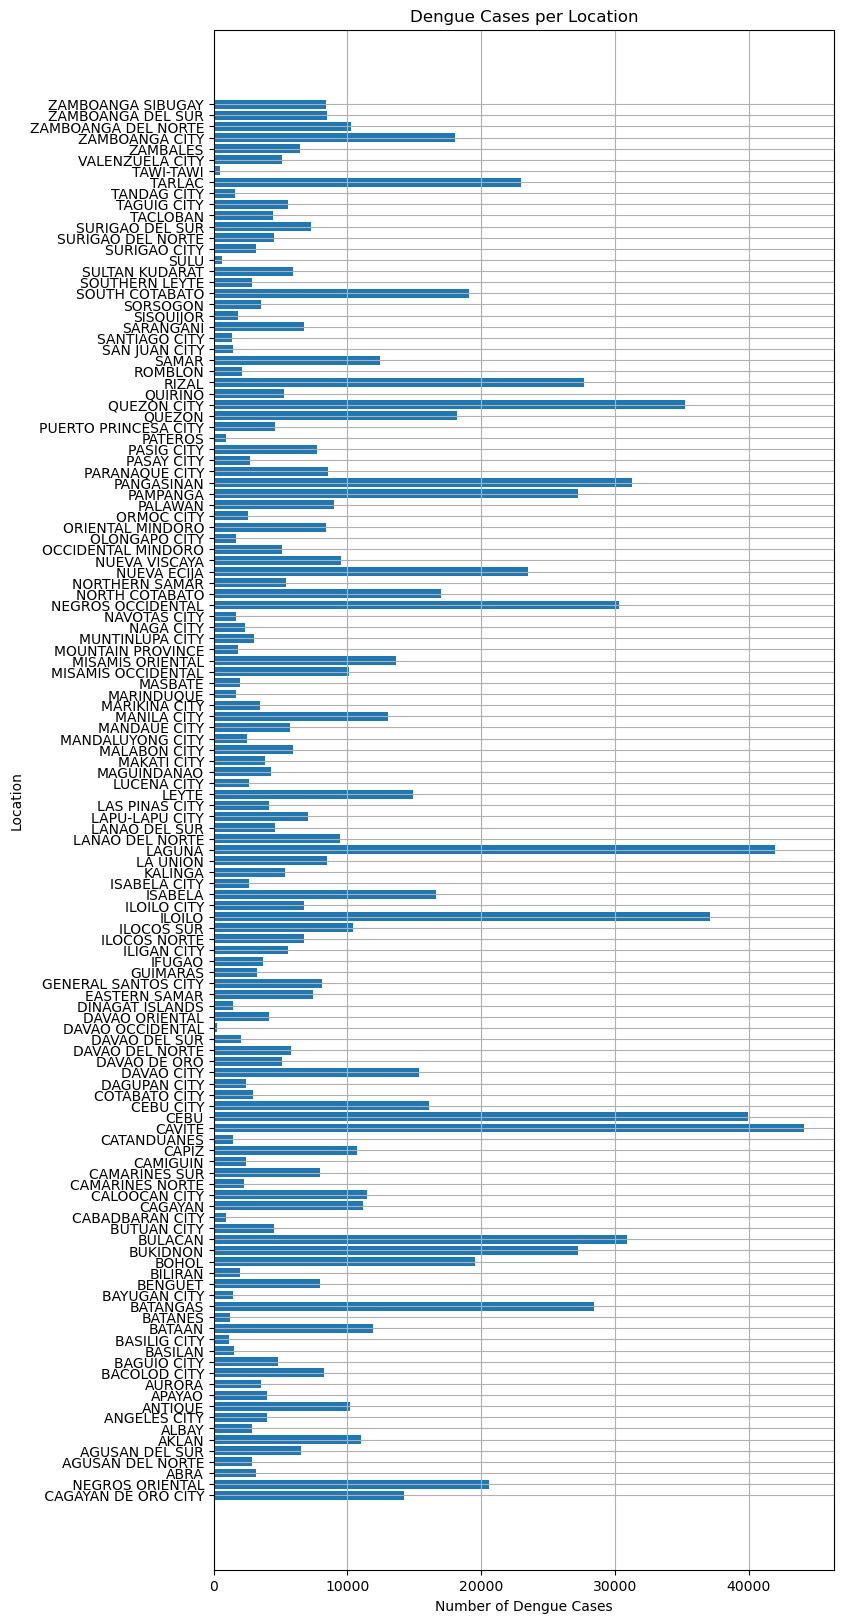

In [72]:
# Y values
loc_group = dengue_data.groupby('Location')
loc_cases = loc_group.sum(numeric_only = True)['Cases']

# Create and Display the plot using horizontal bar chart
plt.figure(figsize=(8, 20)) 
keys = [pair for pair, df in loc_group]
plt.barh(keys, loc_cases)
plt.title('Dengue Cases per Location')
plt.xlabel('Number of Dengue Cases')  
plt.ylabel('Location') 
plt.grid(True) 
plt.show()

### From the graph, it is evident that the Cavite had the highest overall number of cases, whereas Davao Occidental has the lowest count.

In [73]:
# To find the highest and lowest data without using data visualization
dengue_sort = dengue_per_location.sort_values(by='Deaths', ascending=False)
dengue_sort

,Cases,Deaths,Year,Month
Location,,,,
QUEZON CITY,35232,1208,520651,1679
SOUTH COTABATO,19114,855,522668,1684
GENERAL SANTOS CITY,8106,797,522668,1684
NEGROS OCCIDENTAL,30323,778,524687,1695
CEBU,39957,688,524687,1695
...,...,...,...,...
TAWI-TAWI,460,5,522668,1684
OLONGAPO CITY,1652,5,526704,1706
MARINDUQUE,1696,4,526704,1706


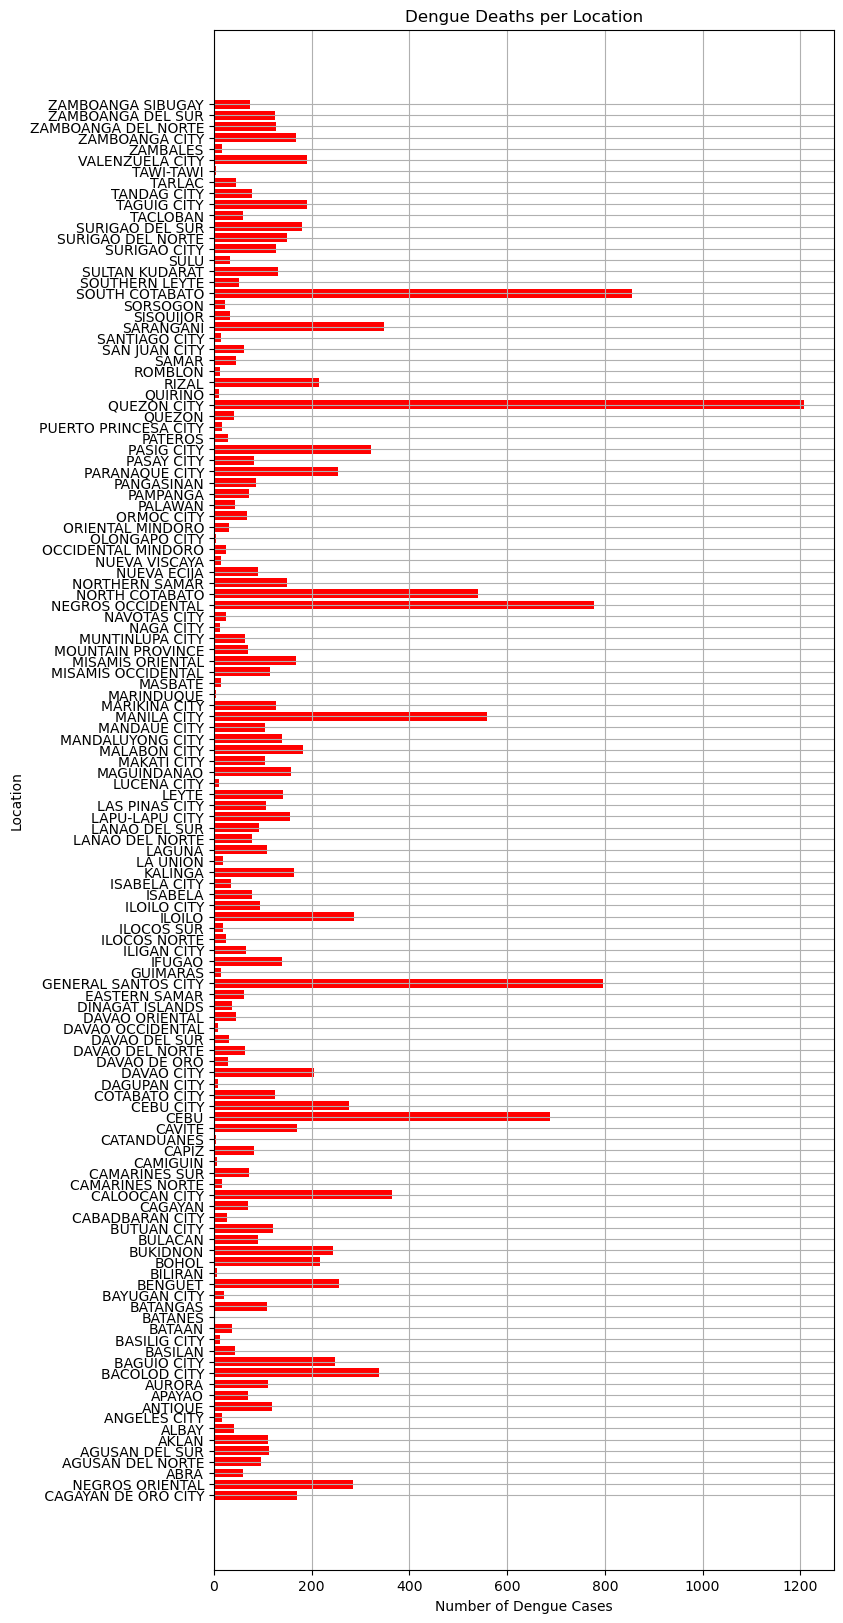

In [74]:
# Y values
loc_group = dengue_data.groupby('Location')
loc_deaths = loc_group.sum(numeric_only = True)['Deaths']

# Create and Display the plot using horizontal bar chart
plt.figure(figsize=(8, 20)) 
keys = [pair for pair, df in loc_group]
plt.barh(keys, loc_deaths, color = 'r')
plt.title('Dengue Deaths per Location')
plt.xlabel('Number of Dengue Cases')  
plt.ylabel('Location') 
plt.grid(True) 
plt.show()

### From the graph, it is evident that the Quezon City had the highest overall number of deaths, whereas Batanes has the lowest count.

### 5. What is the percentage of people who died and survived?

In [75]:
# Get the total number of cases and deaths using sum()
total_cases = dengue_data['Cases'].sum()
total_deaths = dengue_data['Deaths'].sum()
# Subtract number of deaths from number of cases to get the total survives
total_survives = total_cases - total_deaths
# Display the result
print(f'Total cases are {total_cases}')
print(f'Total deaths are {total_deaths}')
print(f'Total survives are {total_survives}')

Total cases are 1149464
Total deaths are 16852
Total survives are 1132612


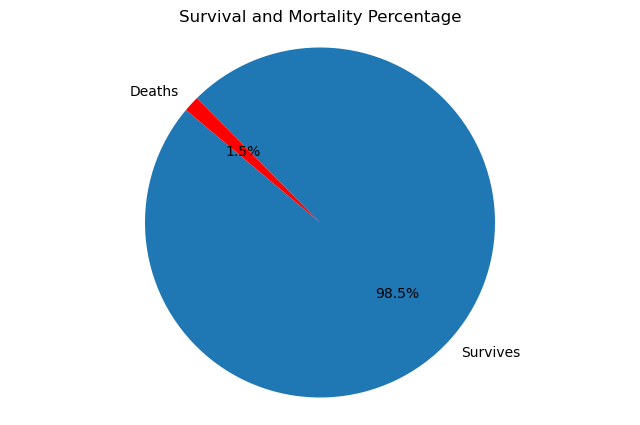

In [76]:
# Create and Display the plot using Pie Graph
labels = ['Survives','Deaths']
sizes = [total_survives,total_deaths]
color = ['#1f77b4','r']
plt.figure(figsize=(8, 5)) 
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140,colors = color)
plt.axis('equal')
plt.title("Survival and Mortality Percentage")
plt.show()

### From the graph, the percentage of people who survived is 98.5% while the people who died is 1.50%